# **PyTorch Refersher**
---

In [6]:
# %pip install torch torchvision

In [7]:
import torch
import numpy as np

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
tensor = torch.tensor([1,2,3], dtype=torch.float32)
print(tensor)

tensor([1., 2., 3.])


In [10]:
tensor = torch.tensor([[1,0],[0,1]])
print(tensor)

tensor([[1, 0],
        [0, 1]])


In [11]:
np_array = np.array([1,2,3])
print(np_array)
np_array = np.array([1,2,3], dtype=np.float32)
print(np_array)
np_array = np.array([[1,2,3],[4,5,6]])
print(np_array)


[1 2 3]
[1. 2. 3.]
[[1 2 3]
 [4 5 6]]


In [12]:
tensor= torch.from_numpy(np_array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [13]:
torch.randint(1,3,[1,2])

tensor([[2, 1]])

- ones, zeroes, rand, randn, randint are tensor generation operations.
- randn generates from a Z-distribution.
- randint requires a high, low, then an array shape in a list form.
- rand generates from a uniform distribution.

In [14]:
a = torch.ones(1,3, dtype=torch.float32)
b = torch.tensor([1,2,3], dtype=torch.float32)

In [15]:
print(a+b)
print(a*b)
print(a/b)
print(a%b)
print(a**b)
print(a.add(b))
print(a.mul(b))
print(a.div(b))

tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])
tensor([[0., 1., 1.]])
tensor([[1., 1., 1.]])
tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])


In [16]:
# print(torch.matmul(a,b))
# print(torch.mm(a,b.transpose(0,1)))


- operator between two operands seem to behave as element-wise operations for each tensor position.
- $a*b$ is equivalent to $a.mul(b)$

## Autograd
---

In [17]:
x = torch.tensor([4.0], requires_grad=True)

y=x**2
z=y*2 + 5
z.backward()
print(x.grad)

tensor([16.])


## Neural Network Implementation
---

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(4,3)
        self.layer2 = nn.Linear(3,5)
        self.layer3 = nn.Linear(5,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [19]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)


In [20]:
x = torch.randn(2,4)
print(x)
print(model(x))

tensor([[-0.9726, -0.4196, -1.0802,  0.0817],
        [ 0.6146, -0.4640, -0.2314,  0.0772]])
tensor([[0.1553],
        [0.2429]], grad_fn=<AddmmBackward0>)


## Training Loop

---

In [21]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.2 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.2 MB 9.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.2 MB 9.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.2 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 9.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 2.1/46.2 MB 10.7 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/46.2 MB 10.5 MB/s eta 0:00:05
   ---- ----------------------------------- 5.8/46.2 MB 9.3 MB/s eta 0:00:05
   ------ --------------------------------- 7.9/

In [22]:
from sklearn.model_selection import train_test_split

x = torch.randn(500,4)
y = torch.randn(500,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([400, 4]) torch.Size([100, 4]) torch.Size([400, 1]) torch.Size([100, 1])


In [23]:


criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

for epoch in range(10000):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")




Epoch 0, Loss: 1.1201716661453247
Epoch 10, Loss: 1.1162874698638916
Epoch 20, Loss: 1.1126441955566406
Epoch 30, Loss: 1.1092270612716675
Epoch 40, Loss: 1.1060200929641724
Epoch 50, Loss: 1.1030116081237793
Epoch 60, Loss: 1.1001887321472168
Epoch 70, Loss: 1.097537875175476
Epoch 80, Loss: 1.0950464010238647
Epoch 90, Loss: 1.0927032232284546
Epoch 100, Loss: 1.0905053615570068
Epoch 110, Loss: 1.0884402990341187
Epoch 120, Loss: 1.086498737335205
Epoch 130, Loss: 1.0846726894378662
Epoch 140, Loss: 1.0829542875289917
Epoch 150, Loss: 1.0813348293304443
Epoch 160, Loss: 1.0798091888427734
Epoch 170, Loss: 1.0783755779266357
Epoch 180, Loss: 1.0770258903503418
Epoch 190, Loss: 1.0757566690444946
Epoch 200, Loss: 1.0745636224746704
Epoch 210, Loss: 1.073440670967102
Epoch 220, Loss: 1.072383165359497
Epoch 230, Loss: 1.0713868141174316
Epoch 240, Loss: 1.070447564125061
Epoch 250, Loss: 1.0695602893829346
Epoch 260, Loss: 1.0687214136123657
Epoch 270, Loss: 1.0679324865341187
Epoch 28

## Dataset and Dataloader
---

In [24]:
import torch
import torch.nn.functional as F
import torch.optim as optimizer
from torch.utils.data import Dataset, DataLoader
import numpy

In [25]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [26]:
X = torch.rand(1000,5)
y = torch.rand(1000,1)

dataset = CustomDataset(X, y)

In [27]:
for it in iter(dataset):
    print(it)

(tensor([0.5766, 0.0244, 0.1822, 0.2936, 0.9523]), tensor([0.2219]))
(tensor([0.0779, 0.7252, 0.3024, 0.8640, 0.8614]), tensor([0.9234]))
(tensor([0.8632, 0.8285, 0.6944, 0.8578, 0.4298]), tensor([0.0779]))
(tensor([0.6237, 0.2553, 0.4708, 0.8558, 0.7456]), tensor([0.1617]))
(tensor([0.3573, 0.0281, 0.9618, 0.5800, 0.9209]), tensor([0.5635]))
(tensor([0.7679, 0.3824, 0.8387, 0.5273, 0.5058]), tensor([0.0904]))
(tensor([0.2893, 0.5038, 0.6071, 0.2617, 0.3213]), tensor([0.6053]))
(tensor([0.9417, 0.2666, 0.0186, 0.4917, 0.1008]), tensor([0.9838]))
(tensor([0.3849, 0.0936, 0.2445, 0.8074, 0.8721]), tensor([0.3206]))
(tensor([0.9530, 0.0657, 0.2383, 0.4931, 0.9635]), tensor([0.3788]))
(tensor([0.6318, 0.8288, 0.4001, 0.4385, 0.7387]), tensor([0.1621]))
(tensor([0.5861, 0.3473, 0.0447, 0.9469, 0.1339]), tensor([0.6816]))
(tensor([0.1235, 0.6588, 0.4463, 0.9194, 0.7534]), tensor([0.1581]))
(tensor([0.9415, 0.4139, 0.4148, 0.1660, 0.9315]), tensor([0.9427]))
(tensor([0.6736, 0.4830, 0.8173, 0

In [28]:
from torchvision import datasets, transforms

In [29]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

mnist_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

100.0%
100.0%
100.0%
100.0%


In [30]:
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [31]:
BATCH_SIZE = 32
train_loader = DataLoader(
    dataset=mnist_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    drop_last=False
)

In [32]:
for batch_id, (X, y) in enumerate(train_loader):
    print(f"Batch: {batch_id}")
    print(f"Input size: {X.shape}")
    print(f"Target: {y.shape}")

Batch: 0
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 1
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 2
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 3
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 4
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 5
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 6
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 7
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 8
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 9
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 10
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 11
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 12
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 13
Input size: torch.Size([3

In [33]:
from torch.utils.data import random_split

total_size = len(mnist_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

print(f"Total Size: {total_size}, Train Size: {train_size}, Test Size: {test_size}")

Total Size: 60000, Train Size: 48000, Test Size: 12000


In [34]:
train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

## Training, Evaluation, Plotting Functions
---

In [51]:
NUM_EPOCHS = 30

def train_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=30, device='cpu'):
    
    # Move model to device
    model = model.to(device)
    
    # For tracking metrics
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(NUM_EPOCHS):

        #Training Phase
        model.train()
        print(f"Epoch {epoch} in progress...")
        running_loss = 0

        for batch_idx, (X, y) in enumerate(train_loader):
            
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            output = model.forward(X)
            loss = criterion(output, y)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        #Evaluation Phase
        model.eval()

        test_loss = 0
        correct = 0
        with torch.no_grad():

            for (X,y) in test_loader:
                X, y = X.to(device), y.to(device)
                output = model.forward(X)
                test_loss += criterion(output, y).item()

                # Get the index of the max log-probability
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(y.view_as(pred)).sum().item()
                

        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)
        
        print(f'Epoch: {epoch+1}/{num_epochs}')
        print(f'Train Loss: {avg_train_loss:.4f}')
        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {accuracy:.2f}%\n')
    
    return train_losses, test_losses, test_accuracies


In [53]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_pred = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model.forward(data)
            pred = output.argmax(dim=1)

            all_pred.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            
    return all_pred, all_targets

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [54]:
def plot_eval_res(predictions, targets):
    
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(targets, predictions))    


## Model Building
---

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [36]:
class NN_Custom(nn.Module):
    def __init__(self):
        super(NN_Custom, self).__init__()
        self.layer1 = nn.Conv2d(1, 16, (3, 3))  # 1 input channel, 16 output channels
        self.pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()

        x = torch.randn(1,1,28,28)
        x = self.pool(self.layer1(x))
        x = self.flatten(x)
        print(x.shape[1])
        self.layer2 = nn.Linear(x.shape[1], 10)


        # self.layer2 = nn.Linear(16 * 26 * 26, 10)  # Adjusted for output size after conv layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.layer2(x)
        return x


In [ ]:

model_2 = NN_Custom()
model_2.forward(torch.randn(1, 1, 28, 28))

optimizer_2 = optim.SGD(model.parameters(), lr=0.001)
criterion_2 = nn.CrossEntropyLoss()

train_model(model_2, optimizer_2, criterion_2, train_loader, test_loader, num_epochs=NUM_EPOCHS, device='cuda' )

16
Epoch 0 in progress...
Epoch: 1/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 1 in progress...
Epoch: 2/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 2 in progress...
Epoch: 3/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 3 in progress...
Epoch: 4/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 4 in progress...
Epoch: 5/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 5 in progress...
Epoch: 6/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 6 in progress...
Epoch: 7/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 7 in progress...
Epoch: 8/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 8 in progress...
Epoch: 9/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 9 in progress...
Epoch: 10/30
Train Loss: 2.6703
Test Loss: 2.6848
Test Accuracy: 9.75%

Epoch 10 in progress...
Epoch: 11/30
Train Loss: 2.6703


([2.670251624584198,
  2.6702516271273296,
  2.670251628557841,
  2.6702516352335612,
  2.6702516350746155,
  2.670251625696818,
  2.6702516260147093,
  2.670251624107361,
  2.670251630306244,
  2.670251618385315,
  2.6702516299883525,
  2.6702516193389894,
  2.6702516242663066,
  2.6702516311009723,
  2.670251635869344,
  2.6702516334851585,
  2.6702516209284464,
  2.6702516237894693,
  2.6702516244252523,
  2.6702516187032064,
  2.6702516266504923,
  2.670251639207204,
  2.6702516368230182,
  2.670251626173655,
  2.6702516244252523,
  2.670251640955607,
  2.670251633167267,
  2.670251627445221,
  2.670251623948415,
  2.6702516349156697],
 [2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,
  2.6848217646280923,


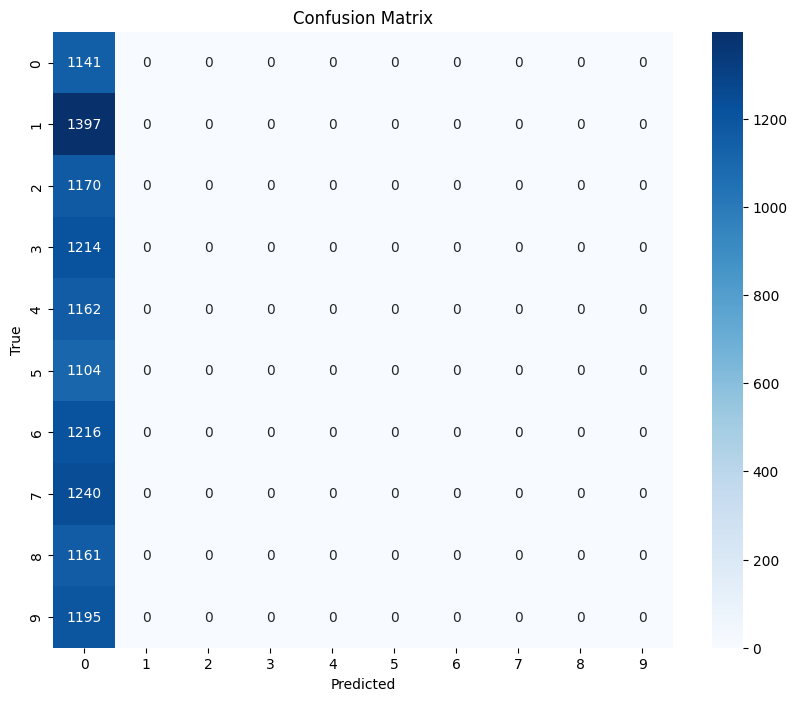

              precision    recall  f1-score   support

           0       0.10      1.00      0.17      1141
           1       0.00      0.00      0.00      1397
           2       0.00      0.00      0.00      1170
           3       0.00      0.00      0.00      1214
           4       0.00      0.00      0.00      1162
           5       0.00      0.00      0.00      1104
           6       0.00      0.00      0.00      1216
           7       0.00      0.00      0.00      1240
           8       0.00      0.00      0.00      1161
           9       0.00      0.00      0.00      1195

    accuracy                           0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000



c:\Users\pcadmin\anaconda3\envs\PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pcadmin\anaconda3\envs\PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pcadmin\anaconda3\envs\PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [57]:
pred, target = evaluate_model(model, test_loader, device)
plot_eval_res(pred, target)

This covers the fundamental concepts of PyTorch. 

Some next topics:
- Dataset and DataLoader
- More complex neural network architectures
- Transfer learning
- Custom loss functions
- Model saving and loading
- Batch processing
- Regularization techniques
